In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

In [9]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


In [10]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [72]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

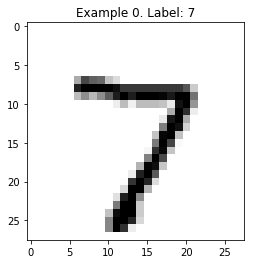

In [75]:
display(0)

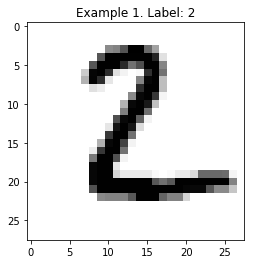

In [14]:
display(1)

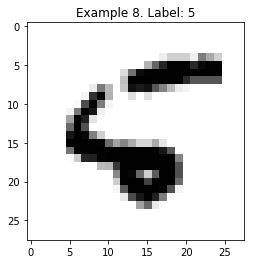

In [15]:
display(8)

In [19]:
print(len(data[0]))

784


In [20]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000202E2C96BA8>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

In [24]:
classifier.evaluate(test_data, test_labels)
print(classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


# This pice of code did not worked for me, don't know why ?

In [61]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

InvalidArgumentError: tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-61-0354ba381638>", line 2, in <module>
    print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\linear.py", line 528, in predict
    as_iterable=as_iterable)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 381, in new_func
    return func(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\linear.py", line 563, in predict_classes
    as_iterable=as_iterable)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\util\deprecation.py", line 316, in new_func
    return func(*args, **kwargs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 615, in predict
    as_iterable=as_iterable)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\contrib\learn\python\learn\estimators\estimator.py", line 919, in _infer_model
    config=self._session_config))
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 787, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 511, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 972, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 977, in _create_session
    return self._sess_creator.create_session()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 668, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 431, in create_session
    self._scaffold.finalize()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\monitored_session.py", line 210, in finalize
    self._saver = training_saver._get_saver_or_default()  # pylint: disable=protected-access
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 821, in _get_saver_or_default
    saver = Saver(sharded=True, allow_empty=True)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 1239, in __init__
    self.build()
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 1248, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 1284, in _build
    build_save=build_save, build_restore=build_restore)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 759, in _build_internal
    restore_sequentially, reshape)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 471, in _AddShardedRestoreOps
    name="restore_shard"))
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 428, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\training\saver.py", line 268, in restore_op
    [spec.tensor.dtype])[0])
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1113, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "c:\users\rajan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = linear//weight; shape in shape_and_slice spec [1,10] does not match the shape stored in checkpoint: [784,10]
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


In [53]:
new_samples = np.array([test_data[0]], dtype=float)

y = list(classifier.predict(new_samples, as_iterable=True))
print('Predictions: {}'.format(str(y)))

print ("Predicted %s, Label: %d" % (str(y), test_labels[0]))

Predictions: [7]
Predicted [7], Label: 7


Predictions: [6]
Predicted [6], Label: 5


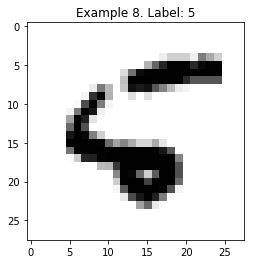

In [59]:
new_samples = np.array([test_data[8]], dtype=float)

y = list(classifier.predict(new_samples, as_iterable=True))
print('Predictions: {}'.format(str(y)))

print ("Predicted %s, Label: %d" % (str(y), test_labels[8]))
display(8)

In [66]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

AttributeError: 'LinearClassifier' object has no attribute 'weights_'